<a href="https://colab.research.google.com/github/codewithsameena/projects/blob/main/IPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
match = pd.read_csv('/matches1.csv')
delivery = pd.read_csv('/deliveries1.csv')

In [ ]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
match.shape

(756, 18)

In [ ]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,1.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,2.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,3.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,4.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,5.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN


In [ ]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [ ]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [ ]:
total_score_df

,match_id,inning,total_runs
0,1,1,207.0
2,2,1,184.0
4,3,1,183.0
6,4,1,163.0
8,5,1,157.0
...,...,...,...
863,428,1,80.0
865,429,1,174.0
867,430,1,139.0
869,431,1,178.0


In [ ]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [ ]:
match_df


,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207.0
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184.0
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183.0
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163.0
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,428,IPL-2013,Hyderabad,04-05-2013,Delhi Daredevils,Sunrisers Hyderabad,Delhi Daredevils,bat,normal,0,Sunrisers Hyderabad,0,6,DJG Sammy,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,S Asnani,NaN,428,80.0
428,429,IPL-2013,Bangalore,14-05-2013,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,7,AC Gilchrist,M Chinnaswamy Stadium,HDPK Dharmasena,S Ravi,NaN,429,174.0
429,430,IPL-2013,Mumbai,05-05-2013,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,60,0,MG Johnson,Wankhede Stadium,HDPK Dharmasena,CK Nandan,NaN,430,139.0
430,431,IPL-2013,Jaipur,05-05-2013,Pune Warriors,Rajasthan Royals,Pune Warriors,bat,normal,0,Rajasthan Royals,0,5,AM Rahane,Sawai Mansingh Stadium,C Shamshuddin,RJ Tucker,NaN,431,178.0


In [ ]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors'], dtype=object)

In [ ]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [ ]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [ ]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [ ]:
match_df.shape

(349, 20)

In [ ]:
match_df = match_df[match_df['dl_applied'] == 0]

In [ ]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [ ]:
delivery_df = match_df.merge(delivery,on='match_id')

In [ ]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [ ]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,1.0,CH Gayle,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,2.0,Mandeep Singh,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,3.0,Mandeep Singh,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,4.0,Mandeep Singh,...,0.0,0.0,0.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,5.0,Mandeep Singh,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81410,430,Mumbai,Mumbai Indians,139.0,2,Chennai Super Kings,Mumbai Indians,15.0,4.0,B Laughlin,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
81411,430,Mumbai,Mumbai Indians,139.0,2,Chennai Super Kings,Mumbai Indians,15.0,5.0,B Laughlin,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
81412,430,Mumbai,Mumbai Indians,139.0,2,Chennai Super Kings,Mumbai Indians,15.0,6.0,B Laughlin,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN
81413,430,Mumbai,Mumbai Indians,139.0,2,Chennai Super Kings,Mumbai Indians,16.0,1.0,B Laughlin,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN


In [ ]:
print(delivery_df.dtypes)

match_id              int64
city                 object
winner               object
total_runs_x        float64
inning                int64
batting_team         object
bowling_team         object
over                float64
ball                float64
batsman              object
non_striker          object
bowler               object
is_super_over       float64
wide_runs           float64
bye_runs            float64
legbye_runs         float64
noball_runs         float64
penalty_runs        float64
batsman_runs        float64
extra_runs          float64
total_runs_y          int64
player_dismissed     object
dismissal_kind       object
fielder              object
dtype: object


In [ ]:
grouped_df = delivery_df.groupby('match_id')['total_runs_y'].cumsum()
print(grouped_df.head())


125    1
126    1
127    1
128    3
129    7
Name: total_runs_y, dtype: int64


In [ ]:
delivery_df['current_score'] = grouped_df


In [ ]:
delivery_df['total_runs_y'] = pd.to_numeric(delivery_df['total_runs_y'], errors='coerce')


In [ ]:
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()


In [ ]:
delivery_df['total_runs_y'] = delivery_df['total_runs_y'].astype(float)


In [ ]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [ ]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [ ]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [ ]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,1.0,CH Gayle,...,0.0,1.0,0.0,1.0,NaN,NaN,NaN,1.0,206.0,119.0
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,2.0,Mandeep Singh,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,206.0,118.0
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,3.0,Mandeep Singh,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,206.0,117.0
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,4.0,Mandeep Singh,...,0.0,2.0,0.0,2.0,NaN,NaN,NaN,3.0,204.0,116.0
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,5.0,Mandeep Singh,...,0.0,4.0,0.0,4.0,NaN,NaN,NaN,7.0,200.0,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81410,430,Mumbai,Mumbai Indians,139.0,2,Chennai Super Kings,Mumbai Indians,15.0,4.0,B Laughlin,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,77.0,62.0,32.0
81411,430,Mumbai,Mumbai Indians,139.0,2,Chennai Super Kings,Mumbai Indians,15.0,5.0,B Laughlin,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,77.0,62.0,31.0
81412,430,Mumbai,Mumbai Indians,139.0,2,Chennai Super Kings,Mumbai Indians,15.0,6.0,B Laughlin,...,0.0,1.0,0.0,1.0,NaN,NaN,NaN,78.0,61.0,30.0
81413,430,Mumbai,Mumbai Indians,139.0,2,Chennai Super Kings,Mumbai Indians,16.0,1.0,B Laughlin,...,0.0,1.0,0.0,1.0,NaN,NaN,NaN,79.0,60.0,29.0


In [ ]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values
delivery_df['wickets'] = 10 - wickets
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,1.0,CH Gayle,...,1.0,0.0,1.0,1,NaN,NaN,1.0,206.0,119.0,9
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,2.0,Mandeep Singh,...,0.0,0.0,0.0,1,NaN,NaN,1.0,206.0,118.0,8
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,3.0,Mandeep Singh,...,0.0,0.0,0.0,1,NaN,NaN,1.0,206.0,117.0,7
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,4.0,Mandeep Singh,...,2.0,0.0,2.0,1,NaN,NaN,3.0,204.0,116.0,6
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,5.0,Mandeep Singh,...,4.0,0.0,4.0,1,NaN,NaN,7.0,200.0,115.0,5


In [ ]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,1.0,CH Gayle,...,1.0,0.0,1.0,1,NaN,NaN,1.0,206.0,119.0,9
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,2.0,Mandeep Singh,...,0.0,0.0,0.0,1,NaN,NaN,1.0,206.0,118.0,8
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,3.0,Mandeep Singh,...,0.0,0.0,0.0,1,NaN,NaN,1.0,206.0,117.0,7
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,4.0,Mandeep Singh,...,2.0,0.0,2.0,1,NaN,NaN,3.0,204.0,116.0,6
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,5.0,Mandeep Singh,...,4.0,0.0,4.0,1,NaN,NaN,7.0,200.0,115.0,5


In [ ]:
 #crr = runs/overs
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [ ]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [ ]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [ ]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [ ]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [ ]:
final_df = final_df.sample(final_df.shape[0])

In [ ]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
75633,Kolkata Knight Riders,Kings XI Punjab,Chandigarh,76.0,61.0,-49,157.0,8.237288,7.47541,0


In [ ]:
final_df.dropna(inplace=True)

In [ ]:
final_df = final_df[final_df['balls_left'] != 0]

In [ ]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
48683,Deccan Chargers,Kolkata Knight Riders,Kolkata,130.0,81.0,-30,163.0,5.076923,9.629630
67893,Royal Challengers Bangalore,Mumbai Indians,Mumbai,47.0,41.0,-70,141.0,7.139241,6.878049
28406,Delhi Daredevils,Kolkata Knight Riders,Johannesburg,37.0,44.0,-70,123.0,6.789474,5.045455
3734,Kolkata Knight Riders,Delhi Daredevils,Kolkata,108.0,82.0,-28,160.0,8.210526,7.902439
68359,Kolkata Knight Riders,Mumbai Indians,Kolkata,108.0,51.0,-59,182.0,6.434783,12.705882
...,...,...,...,...,...,...,...,...,...
16324,Mumbai Indians,Kolkata Knight Riders,Mumbai,51.0,110.0,-1,67.0,9.600000,2.781818
30041,Kings XI Punjab,Delhi Daredevils,Bloemfontein,99.0,103.0,-7,120.0,7.411765,5.766990
21354,Royal Challengers Bangalore,Deccan Chargers,Cape Town,35.0,8.0,-107,184.0,7.982143,26.250000
69544,Delhi Daredevils,Kings XI Punjab,Delhi,93.0,71.0,-40,136.0,5.265306,7.859155


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [ ]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8053040928216244

In [ ]:
pipe.predict_proba(X_test)[10]

array([0.98165725, 0.01834275])

In [ ]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))

In [ ]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [ ]:
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

Target- 178.0


,end_of_over,runs_after_over,wickets_in_over,lose,win
10459,1,4.0,6,73.4,26.6
10467,2,8.0,8,70.7,29.3
10473,3,1.0,6,83.1,16.9
10479,4,7.0,6,83.4,16.6
10485,5,12.0,6,76.0,24.0
10491,6,13.0,6,64.9,35.1
10497,7,9.0,6,62.1,37.9
10505,8,15.0,8,45.0,55.0
10511,9,7.0,6,47.1,52.9
10518,10,17.0,7,26.8,73.2


Text(0.5, 1.0, 'Target-178.0')

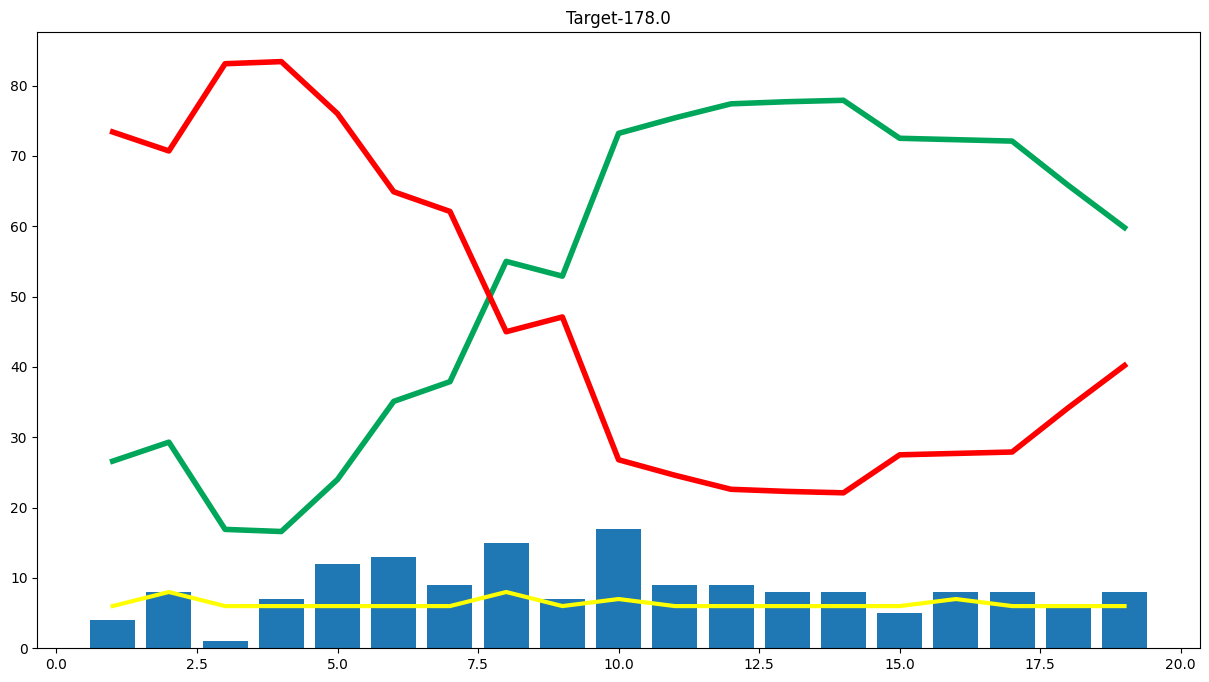

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [ ]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [ ]:
delivery_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur'], dtype=object)